# Safest Aircraft Exploratory Data Analysis

## Load and Examine the Data

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set the option to display all columns
pd.set_option('display.max_columns', None)

# set figsize for seaborn plots
sns.set_theme(rc={'figure.figsize': (15, 7)})

In [2]:
# load aviation accidents data into a DataFrame
df = pd.read_csv('../data/Aviation_Data.csv', low_memory=False)

In [3]:
# examine example of the data
df.head(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,Non-Fatal,Substantial,Airplane,CF-TLU,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,Part 129: Foreign,SCHD,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N4988E,Cessna,180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,Non-Fatal,Substantial,Airplane,N2482N,Cessna,140,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,Non-Fatal,Substantial,Airplane,N7967Q,Cessna,401B,No,2.0,Reciprocating,Part 91: General Aviation,NaN,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,Non-Fatal,Substantial,NaN,N3906K,North American,NAVION L-17B,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982


In [4]:
# examine information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

## Data Cleaning

In [5]:
# check for missing values
df.isna().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: i

### Check and remove duplicates

In [6]:
# check for duplicates
df[df.duplicated()]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
64050,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64052,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64388,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64541,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64552,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89956,NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90004,NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90010,NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90031,NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# remove duplicates
df_cleaned = df.drop_duplicates()
df_cleaned

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,091,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [8]:
# double check all duplicates removed
df_cleaned[df_cleaned.duplicated()]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date


In [9]:
# check missing values again (after duplicates removed)
df_cleaned.isna().sum()

Event.Id                     69
Investigation.Type            0
Accident.Number              69
Event.Date                   69
Location                    121
Country                     295
Latitude                  54576
Longitude                 54585
Airport.Code              38709
Airport.Name              36168
Injury.Severity            1069
Aircraft.damage            3263
Aircraft.Category         56671
Registration.Number        1386
Make                        132
Model                       161
Amateur.Built               171
Number.of.Engines          6153
Engine.Type                7146
FAR.Description           56935
Schedule                  76376
Purpose.of.flight          6261
Air.carrier               72310
Total.Fatal.Injuries      11470
Total.Serious.Injuries    12579
Total.Minor.Injuries      12002
Total.Uninjured            5981
Weather.Condition          4561
Broad.phase.of.flight     27234
Report.Status              6450
Publication.Date          15299
dtype: i

### Handle missing values

#### Features with a high percentage of missing values

In [10]:
# Original DataFrame: 90348 rows x 31 columns
# Duplicates removed: 88958 rows × 31 columns
# FAR: Federal Aviation Regulations

#Latitude                  54576 (61%) --> drop, not crucial to analysis
#Longitude                 54585 (61%) --> drop, not crucial to analysis
#Airport.Code              38709 (43%) --> drop, not crucial to analysis
#Airport.Name              36168 (40%) --> drop, not crucial to analysis
#Aircraft.Category         56671 (63%) --> replace NaN with 'Unknown' category
#FAR.Description           56935 (64%) --> drop, not crucial to analysis
#Schedule                  76376 (85%) --> drop, not crucial to analysis
#Air.carrier               72310 (81%) --> drop, not crucial to analysis

#df_cleaned['Latitude'].value_counts()
#df_cleaned['Longitude'].value_counts()
#df_cleaned['Airport.Code'].value_counts()
#df_cleaned['Airport.Name'].value_counts()
#df_cleaned['Aircraft.Category'].value_counts()
#df_cleaned['FAR.Description'].value_counts()
#df_cleaned['Schedule'].value_counts()
#df_cleaned['Air.carrier'].value_counts()
#"Unknown" in df_cleaned['Air.carrier'].value_counts()

# drop columns with a high percentage of missing values and are not crucial to the analysis
df_cleaned = df_cleaned.drop(columns=['Latitude', 'Longitude', 'Airport.Code', 
                                      'Airport.Name', 'FAR.Description', 'Schedule', 
                                      'Air.carrier'], axis=1)
df_cleaned

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [11]:
# check missing values again (after dropping columns)
df_cleaned.isna().sum()

Event.Id                     69
Investigation.Type            0
Accident.Number              69
Event.Date                   69
Location                    121
Country                     295
Injury.Severity            1069
Aircraft.damage            3263
Aircraft.Category         56671
Registration.Number        1386
Make                        132
Model                       161
Amateur.Built               171
Number.of.Engines          6153
Engine.Type                7146
Purpose.of.flight          6261
Total.Fatal.Injuries      11470
Total.Serious.Injuries    12579
Total.Minor.Injuries      12002
Total.Uninjured            5981
Weather.Condition          4561
Broad.phase.of.flight     27234
Report.Status              6450
Publication.Date          15299
dtype: int64

In [12]:
# for Aircraft.Category replace NaN values with 'Unknown' category
df_cleaned['Aircraft.Category'] = df_cleaned['Aircraft.Category'].fillna('Unknown')
df_cleaned['Aircraft.Category'].value_counts()

Unknown              56685
Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: Aircraft.Category, dtype: int64

In [13]:
# check missing values again (after updating Aircraft.Category column)
df_cleaned.isna().sum()

Event.Id                     69
Investigation.Type            0
Accident.Number              69
Event.Date                   69
Location                    121
Country                     295
Injury.Severity            1069
Aircraft.damage            3263
Aircraft.Category             0
Registration.Number        1386
Make                        132
Model                       161
Amateur.Built               171
Number.of.Engines          6153
Engine.Type                7146
Purpose.of.flight          6261
Total.Fatal.Injuries      11470
Total.Serious.Injuries    12579
Total.Minor.Injuries      12002
Total.Uninjured            5981
Weather.Condition          4561
Broad.phase.of.flight     27234
Report.Status              6450
Publication.Date          15299
dtype: int64

#### Check Make and Model have values

It's crucial that we have the Make and/or Model of the aircraft if we are determining safest aircraft.

In [14]:
# check if aircraft make and model have a value
df_cleaned.loc[(df_cleaned['Make'].isna()) & (df_cleaned['Model'].isna())]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
49759,20010329X00666,Incident,DCA01WA007,2000-11-28,"Nairobi, Kenya",Kenya,Incident,Minor,Unknown,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Foreign,NaN
50025,20010202X00389,Accident,MIA01WA069,2001-01-31,"YOPAL, Colombia",Colombia,Fatal(3),Destroyed,Airplane,NaN,NaN,NaN,No,2.0,NaN,NaN,3.0,3.0,NaN,NaN,VMC,NaN,Foreign,NaN
54773,20030619X00910,Accident,DCA03WA039,2003-06-06,"Christchurch, New Zealand",New Zealand,Fatal(8),Destroyed,Unknown,NaN,NaN,NaN,No,NaN,NaN,NaN,8.0,2.0,NaN,NaN,NaN,NaN,Foreign,19-06-2003
54873,20030619X00911,Accident,DCA03WA040,2003-06-17,"EELDE, NETHERLANDS",Netherlands,Non-Fatal,Substantial,Unknown,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,4.0,146.0,NaN,NaN,Foreign,19-06-2003
58803,20050616X00790,Incident,DCA05WA073,2005-06-10,Canada/US borde,NaN,Incident,NaN,Unknown,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Foreign,21-06-2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89440,NaN,02-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89492,NaN,05-08-2022,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89763,NaN,08-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89943,NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# drop rows where make and model are NaN
make_model_nan = df_cleaned['Make'].isna() & df_cleaned['Model'].isna()
df_cleaned = df_cleaned[~make_model_nan]
df_cleaned

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Unknown,NC6404,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Unknown,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Unknown,N5142R,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Unknown,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Unknown,N15NY,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,Unknown,N1867H,PIPER,PA-28-151,No,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,Unknown,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,Unknown,N210CU,CESSNA,210N,No,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [16]:
# check missing values again (after removing those without a Make and Model)
df_cleaned.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     225
Injury.Severity             984
Aircraft.damage            3178
Aircraft.Category             0
Registration.Number        1283
Make                         20
Model                        49
Amateur.Built               101
Number.of.Engines          6043
Engine.Type                7035
Purpose.of.flight          6153
Total.Fatal.Injuries      11397
Total.Serious.Injuries    12506
Total.Minor.Injuries      11928
Total.Uninjured            5907
Weather.Condition          4457
Broad.phase.of.flight     27122
Report.Status              6352
Publication.Date          15228
dtype: int64

#### Categorical features with some missing values

In [17]:
# Investigate values for 14 categorical features still with missing values
#Location                     52 --> keep and use "Unknown" category
#Country                     225 --> keep and use "Unknown" category
#Injury.Severity             984 --> keep and add "Unknown" category
#Aircraft.damage            3178 --> keep and use "Unknown" category
#Registration.Number        1283 --> keep and use "Unknown" category & merge "NONE" and "None"
#Make                         20 --> keep and use "Unknown" category
#Model                        49 --> keep and use "Unknown" category
#Amateur.Built               101 --> keep and add "Unknown" category
#Engine.Type                7035 --> keep and use "Unknown" category & merge "NONE" and "None"
#Purpose.of.flight          6153 --> keep and use "Unknown" category
#Weather.Condition          4457 --> keep and use "UNK" category & merge "UNK" and "Unk"
#Broad.phase.of.flight     27122 --> keep and use "Unknown" category
#Report.Status              6352 --> keep and add "Unknown" category
#Publication.Date          15228 --> drop column, not crucial for analysis

#df_cleaned['Publication.Date'].value_counts() 
#"Unknown" in df_cleaned['Report.Status'].value_counts()

Amateur.Built: 

In the context of aircraft, "amateur-built" means an aircraft constructed or assembled by individuals for their own education or recreation, rather than for commercial purposes.

Weather.Condition:

Visual Meteorological Conditions (VMC) in aviation refer to weather conditions where pilots can navigate safely using visual references (like the ground and other aircraft). 

In aviation, Instrument Meteorological Conditions (IMC) refers to weather conditions where visibility is too poor for pilots to navigate using their natural vision, requiring them to rely on instruments instead. These conditions typically involve low visibility due to clouds, fog, rain, or other phenomena. 

"UNK" in a weather context typically means "unknown" or "unidentified." It indicates that the specific weather condition is not known or has not been identified by the weather reporting system. This could be due to a variety of reasons, such as a faulty sensor, a misreading, or a lack of available information. 

In [18]:
# drop Publication.Date column
df_cleaned = df_cleaned.drop(columns=['Publication.Date'], axis=1)
df_cleaned

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Unknown,NC6404,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Unknown,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Unknown,N5142R,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Unknown,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Unknown,N15NY,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,Unknown,N1867H,PIPER,PA-28-151,No,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,NaN
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,Unknown,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,Unknown,N210CU,CESSNA,210N,No,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [19]:
# for Location replace NaN values with 'Unknown' category
df_cleaned['Location'] = df_cleaned['Location'].fillna('Unknown')
df_cleaned[df_cleaned['Location'] == "Unknown"]['Location'].count()

53

In [20]:
# for Country replace NaN values with 'Unknown' category
df_cleaned['Country'] = df_cleaned['Country'].fillna('Unknown')
df_cleaned[df_cleaned['Country'] == "Unknown"]['Country'].count()

228

In [21]:
# for Injury.Severity replace NaN values with 'Unknown' category
df_cleaned['Injury.Severity'] = df_cleaned['Injury.Severity'].fillna('Unknown')
df_cleaned[df_cleaned['Injury.Severity'] == "Unknown"]['Injury.Severity'].count()

984

In [22]:
# for Aircraft.damage replace NaN values with 'Unknown' category
df_cleaned['Aircraft.damage'] = df_cleaned['Aircraft.damage'].fillna('Unknown')
df_cleaned['Aircraft.damage'].value_counts()

Substantial    64136
Destroyed      18617
Unknown         3297
Minor           2796
Name: Aircraft.damage, dtype: int64

In [23]:
# for Registration.Number replace NaN values with 'Unknown' category
df_cleaned['Registration.Number'] = df_cleaned['Registration.Number'].fillna('Unknown')
df_cleaned['Registration.Number'].value_counts()

Unknown    1286
NONE        344
UNREG       125
None         65
UNK          13
           ... 
SP-LRB        1
N37395        1
N14525        1
N737VQ        1
N7750Y        1
Name: Registration.Number, Length: 79097, dtype: int64

In [24]:
# for Registration.Number merge "NONE" and "None"
df_cleaned.loc[df_cleaned['Registration.Number'] == 'None', 'Registration.Number'] = 'NONE'
df_cleaned['Registration.Number'].value_counts()

Unknown    1286
NONE        409
UNREG       125
UNK          13
USAF          9
           ... 
N551CC        1
SP-LRB        1
N37395        1
N14525        1
N7750Y        1
Name: Registration.Number, Length: 79096, dtype: int64

In [25]:
# for Make replace NaN values with 'Unknown' category
df_cleaned['Make'] = df_cleaned['Make'].fillna('Unknown')
df_cleaned[df_cleaned['Make'] == "Unknown"]['Make'].count()

41

In [26]:
# for Model replace NaN values with 'Unknown' category
df_cleaned['Model'] = df_cleaned['Model'].fillna('Unknown')
df_cleaned[df_cleaned['Model'] == "Unknown"]['Model'].count()

50

In [27]:
# for Amateur.Built replace NaN values with 'Unknown' category
df_cleaned['Amateur.Built'] = df_cleaned['Amateur.Built'].fillna('Unknown')
df_cleaned[df_cleaned['Amateur.Built'] == "Unknown"]['Amateur.Built'].count()

101

In [28]:
# for Engine.Type replace NaN values with 'Unknown' category
df_cleaned['Engine.Type'] = df_cleaned['Engine.Type'].fillna('Unknown')
df_cleaned[df_cleaned['Engine.Type'] == "Unknown"]['Engine.Type'].count()

9086

In [29]:
# for Engine.Type merge "NONE" and "None"
df_cleaned.loc[df_cleaned['Engine.Type'] == 'None', 'Engine.Type'] = 'NONE'
df_cleaned['Engine.Type'].value_counts()

Reciprocating      69529
Unknown             9086
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Turbo Jet            703
NONE                  21
Geared Turbofan       12
Electric              10
LR                     2
Hybrid Rocket          1
UNK                    1
Name: Engine.Type, dtype: int64

In [30]:
# for Purpose.of.flight replace NaN values with 'Unknown' category
df_cleaned['Purpose.of.flight'] = df_cleaned['Purpose.of.flight'].fillna('Unknown')
df_cleaned[df_cleaned['Purpose.of.flight'] == "Unknown"]['Purpose.of.flight'].count()

12953

In [31]:
# for Weather.Condition replace NaN values with 'Unknown' category
df_cleaned['Weather.Condition'] = df_cleaned['Weather.Condition'].fillna('UNK')
df_cleaned[df_cleaned['Weather.Condition'] == "UNK"]['Weather.Condition'].count()

5313

In [32]:
# for Weather.Condition merge "UNK" and "Unk"
df_cleaned.loc[df_cleaned['Weather.Condition'] == 'Unk', 'Weather.Condition'] = 'UNK'
df_cleaned['Weather.Condition'].value_counts()

VMC    77295
IMC     5976
UNK     5575
Name: Weather.Condition, dtype: int64

In [33]:
# for Broad.phase.of.flight replace NaN values with 'Unknown' category
df_cleaned['Broad.phase.of.flight'] = df_cleaned['Broad.phase.of.flight'].fillna('Unknown')
df_cleaned[df_cleaned['Broad.phase.of.flight'] == "Unknown"]['Broad.phase.of.flight'].count()

27670

In [34]:
# for Report.Status replace NaN values with 'Unknown' category
df_cleaned['Report.Status'] = df_cleaned['Report.Status'].fillna('Unknown')
df_cleaned[df_cleaned['Report.Status'] == "Unknown"]['Report.Status'].count()

6352

In [35]:
# check for missing values again (after cleaning categorical columns)
df_cleaned.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category             0
Registration.Number           0
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines          6043
Engine.Type                   0
Purpose.of.flight             0
Total.Fatal.Injuries      11397
Total.Serious.Injuries    12506
Total.Minor.Injuries      11928
Total.Uninjured            5907
Weather.Condition             0
Broad.phase.of.flight         0
Report.Status                 0
dtype: int64

#### Check if Make and Model are both "Unknown"

In [36]:
# drop rows where make and model are Unknown as it won't be possible to identify the aircraft
make_model_unknown = (df_cleaned['Make'] == 'Unknown') & (df_cleaned['Model'] == 'Unknown')
df_cleaned = df_cleaned[~make_model_unknown]
df_cleaned

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Unknown,NC6404,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Unknown,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Unknown,N5142R,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Unknown,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Unknown,N15NY,Cessna,501,No,NaN,Unknown,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,Unknown,Unknown,N1867H,PIPER,PA-28-151,No,NaN,Unknown,Personal,0.0,1.0,0.0,0.0,UNK,Unknown,Unknown
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,Unknown,Unknown,Unknown,N2895Z,BELLANCA,7ECA,No,NaN,Unknown,Unknown,0.0,0.0,0.0,0.0,UNK,Unknown,Unknown
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,Unknown,Personal,0.0,0.0,0.0,1.0,VMC,Unknown,Unknown
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,Unknown,Unknown,Unknown,N210CU,CESSNA,210N,No,NaN,Unknown,Personal,0.0,0.0,0.0,0.0,UNK,Unknown,Unknown


#### Continous features with some missing values

Number.of.Engines:

An aircraft can have zero engines. Specifically, gliders are designed to fly without engines. They rely on lift generated by their wings from moving air currents or by being towed aloft and then released. Even aircraft with engines, like commercial airliners, can glide for significant distances if their engines fail. 

In [37]:
df_cleaned['Number.of.Engines'].value_counts()

1.0    69580
2.0    11078
0.0     1226
3.0      483
4.0      431
8.0        3
6.0        1
Name: Number.of.Engines, dtype: int64

In [38]:
df_cleaned['Number.of.Engines'].mean()

1.1465785850583319

In [39]:
df_cleaned['Number.of.Engines'].median()

1.0

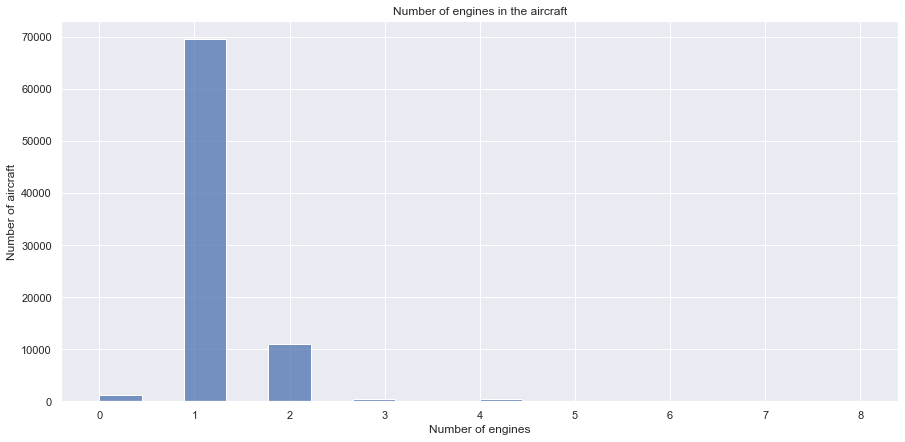

In [40]:
number_of_engines_histogram = sns.histplot(data=df_cleaned, x='Number.of.Engines')
number_of_engines_histogram.set(xlabel='Number of engines', ylabel='Number of aircraft', 
                                title='Number of engines in the aircraft');

In [41]:
# for Number.of.Engines replace NaN values with median value
number_of_engines_median = df_cleaned['Number.of.Engines'].median()
df_cleaned = df_cleaned.fillna({ 'Number.of.Engines': number_of_engines_median })
df_cleaned['Number.of.Engines'].value_counts()

1.0    75622
2.0    11078
0.0     1226
3.0      483
4.0      431
8.0        3
6.0        1
Name: Number.of.Engines, dtype: int64

In [42]:
#Total.Fatal.Injuries      11397
#Total.Serious.Injuries    12506
#Total.Minor.Injuries      11928
#Total.Uninjured            5907
#df_cleaned['Total.Fatal.Injuries'].value_counts()
#df_cleaned['Total.Fatal.Injuries'].mean()
#df_cleaned['Total.Fatal.Injuries'].median()
#df_cleaned['Total.Serious.Injuries'].value_counts()
#df_cleaned['Total.Serious.Injuries'].mean()
#df_cleaned['Total.Serious.Injuries'].median()
#df_cleaned['Total.Minor.Injuries'].value_counts()
#df_cleaned['Total.Minor.Injuries'].mean()
#df_cleaned['Total.Minor.Injuries'].median()
#df_cleaned['Total.Uninjured'].value_counts()
#df_cleaned['Total.Uninjured'].mean()
#df_cleaned['Total.Uninjured'].median()

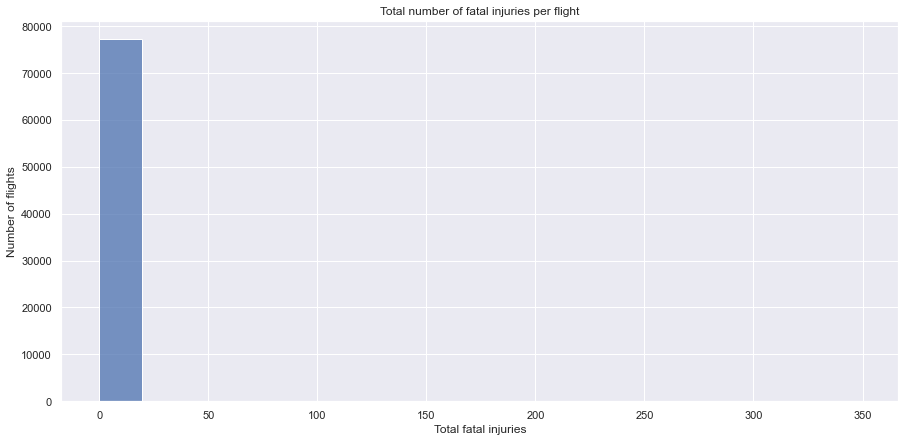

In [43]:
total_fatal_injuries_histogram = sns.histplot(data=df_cleaned, x='Total.Fatal.Injuries')
total_fatal_injuries_histogram.set(xlabel='Total fatal injuries', ylabel='Number of flights', 
                                title='Total number of fatal injuries per flight');

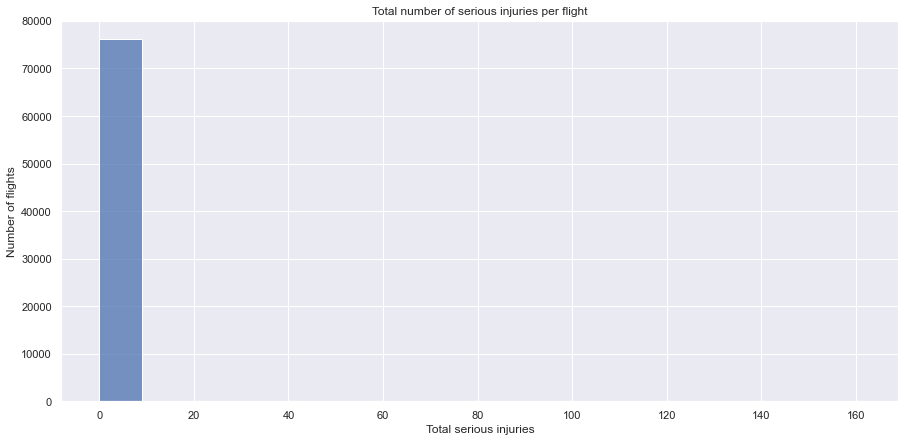

In [44]:
total_serious_injuries_histogram = sns.histplot(data=df_cleaned, x='Total.Serious.Injuries')
total_serious_injuries_histogram.set(xlabel='Total serious injuries', ylabel='Number of flights', 
                                title='Total number of serious injuries per flight');

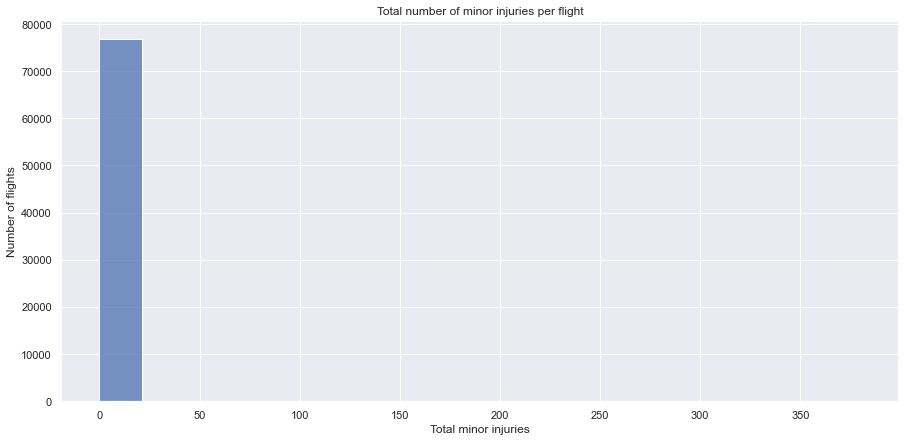

In [45]:
total_minor_injuries_histogram = sns.histplot(data=df_cleaned, x='Total.Minor.Injuries')
total_minor_injuries_histogram.set(xlabel='Total minor injuries', ylabel='Number of flights', 
                                title='Total number of minor injuries per flight');

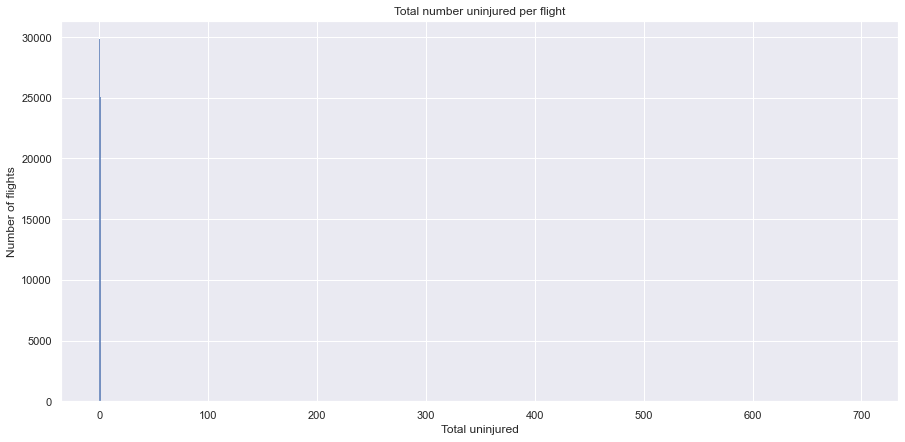

In [46]:
total_uninjured_histogram = sns.histplot(data=df_cleaned, x='Total.Uninjured')
total_uninjured_histogram.set(xlabel='Total uninjured', ylabel='Number of flights', 
                              title='Total number uninjured per flight');

In [47]:
# for Total.Fatal.Injuries replace NaN values with median value
total_fatal_injuries_median = df_cleaned['Total.Fatal.Injuries'].median()
df_cleaned = df_cleaned.fillna({ 'Total.Fatal.Injuries': total_fatal_injuries_median })
df_cleaned['Total.Fatal.Injuries'].value_counts()

0.0      71040
1.0       8881
2.0       5171
3.0       1587
4.0       1103
         ...  
31.0         1
169.0        1
150.0        1
117.0        1
156.0        1
Name: Total.Fatal.Injuries, Length: 125, dtype: int64

In [48]:
# for Total.Serious.Injuries replace NaN values with median value
total_serious_injuries_median = df_cleaned['Total.Serious.Injuries'].median()
df_cleaned = df_cleaned.fillna({ 'Total.Serious.Injuries': total_serious_injuries_median })
df_cleaned['Total.Serious.Injuries'].value_counts()

0.0      75758
1.0       9125
2.0       2814
3.0        628
4.0        258
5.0         78
6.0         40
7.0         27
9.0         15
8.0         13
10.0        13
13.0         9
11.0         6
26.0         5
14.0         5
12.0         5
25.0         3
20.0         3
28.0         3
17.0         2
50.0         2
59.0         2
21.0         2
47.0         2
55.0         1
88.0         1
41.0         1
67.0         1
33.0         1
18.0         1
161.0        1
81.0         1
39.0         1
137.0        1
27.0         1
15.0         1
45.0         1
125.0        1
23.0         1
44.0         1
106.0        1
22.0         1
34.0         1
16.0         1
35.0         1
53.0         1
43.0         1
63.0         1
19.0         1
60.0         1
Name: Total.Serious.Injuries, dtype: int64

In [49]:
# for Total.Minor.Injuries replace NaN values with median value
total_minor_injuries_median = df_cleaned['Total.Minor.Injuries'].median()
df_cleaned = df_cleaned.fillna({ 'Total.Minor.Injuries': total_minor_injuries_median })
df_cleaned['Total.Minor.Injuries'].value_counts()

0.0      73344
1.0      10320
2.0       3576
3.0        784
4.0        371
5.0        129
6.0         66
7.0         59
9.0         22
8.0         20
13.0        14
12.0        11
10.0        11
14.0        10
11.0         9
17.0         8
18.0         6
19.0         6
22.0         5
24.0         5
15.0         4
33.0         4
16.0         4
25.0         4
23.0         3
21.0         3
32.0         3
20.0         3
27.0         3
26.0         3
30.0         2
36.0         2
42.0         2
28.0         2
38.0         2
50.0         2
31.0         2
43.0         1
39.0         1
65.0         1
47.0         1
57.0         1
58.0         1
29.0         1
45.0         1
62.0         1
71.0         1
200.0        1
125.0        1
96.0         1
69.0         1
380.0        1
68.0         1
171.0        1
35.0         1
40.0         1
84.0         1
Name: Total.Minor.Injuries, dtype: int64

In [50]:
# for Total.Uninjured replace NaN values with median value
total_uninjured_median = df_cleaned['Total.Uninjured'].median()
df_cleaned = df_cleaned.fillna({ 'Total.Uninjured': total_uninjured_median })
df_cleaned['Total.Uninjured'].value_counts()

1.0      31008
0.0      29853
2.0      15985
3.0       4313
4.0       2661
         ...  
325.0        1
230.0        1
260.0        1
251.0        1
414.0        1
Name: Total.Uninjured, Length: 379, dtype: int64

In [51]:
df_cleaned.isna().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
dtype: int64

#### Summary

After handling missing values, dropped total of 1504 rows/observations and 8 columns/features.

In [52]:
print('Original DataFrame: ', df.shape)
print('Cleaned DataFrame: ', df_cleaned.shape)

Original DataFrame:  (90348, 31)
Cleaned DataFrame:  (88844, 23)


### Transform the Data